<a href="https://www.kaggle.com/code/niramay/us-presidential-speech?scriptVersionId=109363511" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# importing the libraries
import numpy as np
import pandas as pd 
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import spacy


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# The link to the speech
speech_link = "https://millercenter.org/the-presidency/presidential-speeches/may-25-1961-goal-sending-man-moon"

# making a get request to the link specified above
html = requests.get(speech_link).text

# beautiful soup scraper initializer
soup = BeautifulSoup(html, "lxml")

# scraping the link 
transcript = soup.find("div", {"class": "view-transcript"})
print(transcript.text)




View Transcript
      




Transcript
Mr. Speaker, Mr. Vice President, my copartners in Government, gentlemen and ladies:

The Constitution imposes upon me the obligation to "from time to time give to the Congress information of the State of the Union." While this has traditionally been interpreted as an annual affair, this tradition has been broken in extraordinary times.

These are extraordinary times. And we face an extraordinary challenge. Our strength as well as our convictions have imposed upon this nation the role of leader in freedom's cause.

No role in history could be more difficult or more important. We stand for freedom. That is our conviction for ourselves—that is our only commitment to others. No friend, no neutral and no adversary should think otherwise. We are not against any man—or any nation—or any system—except as it is hostile to freedom. Nor am I here to present a new military doctrine, bearing any one name or aimed at any one area. I am here to promote the fre

In [3]:
speech = transcript.text[41:]

# replace new lines with a space
speech = speech.replace("\n", " ")

nlp = spacy.load('en_core_web_sm')

speech_spacy = nlp(speech)

tokens = []

for tok in speech_spacy:
  if not tok.is_punct:
    tokens.append(tok.text)

clean_speech = " ".join(t for t in tokens)
stopwords = set(STOPWORDS)
clean_speech

"Mr. Speaker Mr. Vice President my copartners in Government gentlemen and ladies \r  The Constitution imposes upon me the obligation to from time to time give to the Congress information of the State of the Union While this has traditionally been interpreted as an annual affair this tradition has been broken in extraordinary times \r  These are extraordinary times And we face an extraordinary challenge Our strength as well as our convictions have imposed upon this nation the role of leader in freedom 's cause \r  No role in history could be more difficult or more important We stand for freedom That is our conviction for ourselves that is our only commitment to others No friend no neutral and no adversary should think otherwise We are not against any man or any nation or any system except as it is hostile to freedom Nor am I here to present a new military doctrine bearing any one name or aimed at any one area I am here to promote the freedom doctrine \r  The great battleground for the d

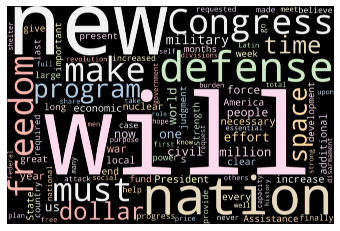

In [4]:
wordCloud = WordCloud(height=4000,width=6000,min_font_size=16, max_words=100,stopwords= stopwords, background_color="black",random_state=1,colormap='Pastel1',collocations = False).generate(clean_speech)

plt.figure()
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

The words that appear most prominently are "New", "Congress", "will", "nation", "dollar", "program", "space", "defence". This is a word cloud for special message by John F. Kennedy to the congress on the Urgent National Needs. The President asks Congress for an increase in funds to send a man to the moon, to increase unmanned space exploration, to develop a nuclear rocket, and to advance satellite technology. It summarizes the speech and the most frequently occuring words highlight the most salient themes of the text. It can also be observed that the word "Will" appears the largest amogst all the others. This means that the word cloud does not necessarily represent the importance of the words but the frequency of them appearing in the text. The word "military" is much smaller than the word "defense" which means that the words with similar means are also not accounted for and the content is not accurately represented. 